# Loading DATA 

In [3]:
%%capture
from mp1 import generate_dataset_regression
import sys
import matplotlib
from matplotlib import cm
from PIL import Image
import numpy as np
[X_train, y_train] = generate_dataset_regression(300, 20);
import matplotlib.pyplot as plt

In [7]:
print y_train.shape

(300, 6)


In [6]:
#Reformating the Desired Output
print y_train.shape
Y_train = y_train.reshape(-1,3,2)
print Y_train[0]
print Y_train.shape

(300, 6)
[[0.63443136 0.68992121]
 [0.6418046  0.07056106]
 [0.26488924 0.71976322]]
(300, 3, 2)


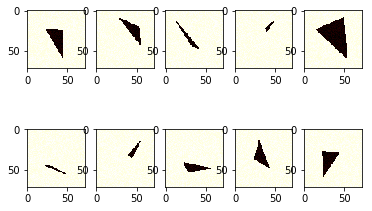

In [5]:
#visualizing images

im = X_train.reshape(X_train.shape[0], 72, 72) 
f, mat = plt.subplots(2,5)
mat[0,0].imshow(im[0],cmap=cm.afmhot)
mat[0,1].imshow(im[1],cmap=cm.afmhot)
mat[0,2].imshow(im[2],cmap=cm.afmhot)
mat[0,3].imshow(im[3],cmap=cm.afmhot)
mat[0,4].imshow(im[4],cmap=cm.afmhot)
mat[1,0].imshow(im[5],cmap=cm.afmhot)
mat[1,1].imshow(im[6],cmap=cm.afmhot)
mat[1,2].imshow(im[7],cmap=cm.afmhot)
mat[1,3].imshow(im[8],cmap=cm.afmhot)
mat[1,4].imshow(im[9],cmap=cm.afmhot)

In [7]:
#Reformating the Desired Input

X_train = X_train.reshape(X_train.shape[0],1, 72, 72)
print (X_train.shape)
X_train /= 255

(300, 1, 72, 72)


# Defining the model 

In [11]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten, RepeatVector

from keras.layers import Conv2D, MaxPooling2D 
model = Sequential() 
model.add(Conv2D(32, (9, 9), activation='relu', input_shape=(1,72,72),
                 data_format='channels_first'))
print(model.output_shape)

(None, 32, 64, 64)


In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

(None, 16, 32, 64)


In [13]:
model.add(Dropout(0.25))
print(model.output_shape)

(None, 16, 32, 64)


In [14]:
model.add(Flatten())
model.add(Dense(256, activation='relu')) 
model.add(Dropout(0.5))
model.add(RepeatVector(3))

#we use the ReapeatVector to have two output,so we can repeat the vector. 

model.add(Dense(2, activation='softmax'))
print(model.output_shape)

(None, 3, 2)


# Optimization

In [14]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy']) 

In [30]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1)

Epoch 1/30
300/300 [==============================] - 3s 9ms/step - loss: 0.0708 - acc: 0.6989
Epoch 2/30
300/300 [==============================] - 3s 9ms/step - loss: 0.0707 - acc: 0.7044
Epoch 3/30
300/300 [==============================] - 3s 9ms/step - loss: 0.0710 - acc: 0.6978
Epoch 4/30
300/300 [==============================] - 3s 9ms/step - loss: 0.0708 - acc: 0.6989
Epoch 5/30
300/300 [==============================] - 3s 8ms/step - loss: 0.0706 - acc: 0.6944
Epoch 6/30
300/300 [==============================] - 3s 8ms/step - loss: 0.0705 - acc: 0.6956
Epoch 7/30
300/300 [==============================] - 3s 9ms/step - loss: 0.0706 - acc: 0.6900
Epoch 8/30
300/300 [==============================] - 4s 12ms/step - loss: 0.0704 - acc: 0.7000
Epoch 9/30
300/300 [==============================] - 4s 13ms/step - loss: 0.0704 - acc: 0.6967
Epoch 10/30
300/300 [==============================] - 4s 13ms/step - loss: 0.0707 - acc: 0.6989
Epoch 11/30
300/300 [=========================

# Testing

In [16]:
from mp1 import generate_test_set_regression
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [17]:
Y_test = Y_test.reshape(-1,3,2)
print Y_test.shape

(300, 3, 2)


In [22]:
X_test = X_test.reshape(X_test.shape[0],1, 72, 72)
X_test /= 255
model.predict(X_test)

array([[[0.49676552, 0.50323445],
        [0.49676552, 0.50323445],
        [0.49676552, 0.50323445]],

       [[0.49676257, 0.5032374 ],
        [0.49676257, 0.5032374 ],
        [0.49676257, 0.5032374 ]],

       [[0.49676085, 0.50323915],
        [0.49676085, 0.50323915],
        [0.49676085, 0.50323915]],

       ...,

       [[0.4967624 , 0.5032376 ],
        [0.4967624 , 0.5032376 ],
        [0.4967624 , 0.5032376 ]],

       [[0.49676055, 0.50323945],
        [0.49676055, 0.50323945],
        [0.49676055, 0.50323945]],

       [[0.49676296, 0.503237  ],
        [0.49676296, 0.503237  ],
        [0.49676296, 0.503237  ]]], dtype=float32)

In [28]:
from mp1 import visualize_prediction

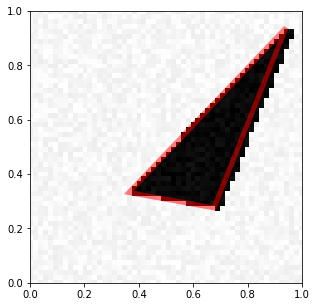

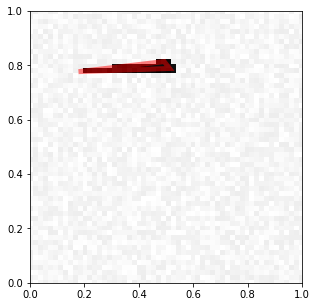

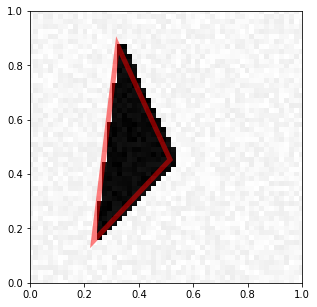

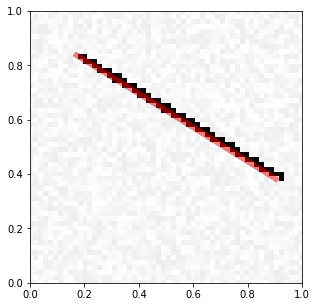

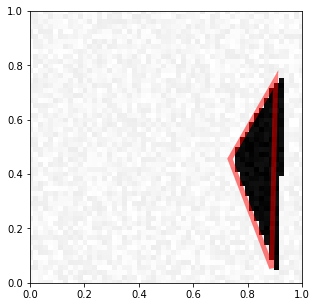

In [29]:

visualize_prediction(X_test[0], Y_test[0])
visualize_prediction(X_test[1], Y_test[1])
visualize_prediction(X_test[2], Y_test[2])
visualize_prediction(X_test[3], Y_test[3])
visualize_prediction(X_test[4], Y_test[4])